In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#### Questions
- What does the distribution of key features look like?
- Which features are identified as having a significant impact on predicting match outcomes according to the correlation analysis?
- How has the team's overall performance, encompassing both attack and defensive aspects, evolved over the last three seasons?
- How Penality kicks and Free kicks contribute to the winning of the match?
- Does the Homeland advantage, Fans attendence, time of the match has a signeficant impact on the results?
- What relations can be observed between shot metrics (sh, sot) and the distance of shots (dist) to match result
- What are the Key features that contribute the most on match result?
- Does the team's scoreing rate has a relation with match result?
- Which features are contributing the least on match result?

### EDA (Exploratory Data Analysis)

In [107]:
matches = pd.read_csv("matches.csv")

Understanding the data

In [108]:
matches.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,0,2023-08-13,16:30,Premier League,Matchweek 1,Sun,Away,D,1.0,1.0,...,Match Report,NaN,13.0,1.0,17.8,0.0,0,0,2023,Liverpool
1,1,2023-08-19,15:00,Premier League,Matchweek 2,Sat,Home,W,3.0,1.0,...,Match Report,NaN,25.0,9.0,16.8,1.0,0,1,2023,Liverpool
2,2,2023-08-27,16:30,Premier League,Matchweek 3,Sun,Away,W,2.0,1.0,...,Match Report,NaN,9.0,4.0,17.2,1.0,0,0,2023,Liverpool
3,3,2023-09-03,14:00,Premier League,Matchweek 4,Sun,Home,W,3.0,0.0,...,Match Report,NaN,17.0,4.0,14.7,0.0,0,0,2023,Liverpool
4,4,2023-09-16,12:30,Premier League,Matchweek 5,Sat,Away,W,3.0,1.0,...,Match Report,NaN,16.0,5.0,15.8,0.0,0,0,2023,Liverpool


In [109]:
matches.tail()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1835,38,2022-04-30,15:00,Premier League,Matchweek 35,Sat,Away,L,0.0,2.0,...,Match Report,NaN,9.0,3.0,21.6,0.0,0,0,2021,Norwich City
1836,39,2022-05-08,14:00,Premier League,Matchweek 36,Sun,Home,L,0.0,4.0,...,Match Report,NaN,8.0,2.0,22.2,1.0,0,0,2021,Norwich City
1837,40,2022-05-11,19:45,Premier League,Matchweek 21,Wed,Away,L,0.0,3.0,...,Match Report,NaN,9.0,5.0,17.0,0.0,0,0,2021,Norwich City
1838,41,2022-05-15,14:00,Premier League,Matchweek 37,Sun,Away,D,1.0,1.0,...,Match Report,NaN,11.0,2.0,14.4,0.0,0,0,2021,Norwich City
1839,42,2022-05-22,16:00,Premier League,Matchweek 38,Sun,Home,L,0.0,5.0,...,Match Report,NaN,9.0,0.0,18.6,0.0,0,0,2021,Norwich City


In [110]:
matches.describe()

,Unnamed: 0,gf,ga,xg,xga,poss,attendance,notes,sh,sot,dist,fk,pk,pkatt,season
count,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1834.000000,0.0,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000
mean,21.448913,1.442391,1.442391,1.402337,1.402337,50.000543,39571.731734,NaN,12.687500,4.204891,17.163859,0.408696,0.109239,0.135326,2021.760870
std,14.511948,1.310412,1.310412,0.826880,0.826880,12.684206,16276.304194,NaN,5.503141,2.446797,2.974427,0.636339,0.327333,0.362236,0.728053
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,9972.000000,NaN,1.000000,0.000000,6.800000,0.000000,0.000000,0.000000,2021.000000
25%,9.000000,0.000000,0.000000,0.800000,0.800000,40.000000,28869.000000,NaN,9.000000,2.000000,15.300000,0.000000,0.000000,0.000000,2021.000000
50%,19.000000,1.000000,1.000000,1.300000,1.300000,50.000000,36657.000000,NaN,12.000000,4.000000,17.000000,0.000000,0.000000,0.000000,2022.000000
75%,33.000000,2.000000,2.000000,1.900000,1.900000,60.000000,53093.000000,NaN,16.000000,6.000000,18.900000,1.000000,0.000000,0.000000,2022.000000
max,61.000000,9.000000,9.000000,5.900000,5.900000,82.000000,75546.000000,NaN,32.000000,15.000000,39.900000,4.000000,2.000000,2.000000,2023.000000


In [111]:
matches.dtypes

Unnamed: 0        int64
date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk                int64
pkatt             int64
season            int64
team             object
dtype: object

In [112]:
matches.shape

(1840, 28)

In [113]:
matches.columns

Index(['Unnamed: 0', 'date', 'time', 'comp', 'round', 'day', 'venue', 'result',
       'gf', 'ga', 'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain',
       'formation', 'referee', 'match report', 'notes', 'sh', 'sot', 'dist',
       'fk', 'pk', 'pkatt', 'season', 'team'],
      dtype='object')

In [114]:
matches.nunique()

Unnamed: 0       62
date            286
time             18
comp              1
round            38
day               7
venue             2
result            3
gf               10
ga               10
opponent         25
xg               48
xga              48
poss             65
attendance      871
captain         122
formation        20
referee          28
match report      1
notes             0
sh               32
sot              16
dist            169
fk                5
pk                3
pkatt             3
season            3
team             25
dtype: int64

In [115]:
matches['team'].unique()

array(['Liverpool', 'Arsenal', 'Aston Villa', 'Manchester City',
       'Tottenham Hotspur', 'Manchester United', 'Newcastle United',
       'Brighton and Hove Albion', 'West Ham United', 'Fulham',
       'Brentford', 'Chelsea', 'Wolverhampton Wanderers', 'Bournemouth',
       'Crystal Palace', 'Nottingham Forest', 'Everton', 'Luton Town',
       'Burnley', 'Sheffield United', 'Leicester City', 'Leeds United',
       'Southampton', 'Watford', 'Norwich City'], dtype=object)

Cleaning the data

In [116]:
matches.isnull().sum()

Unnamed: 0         0
date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                 0
xga                0
poss               0
attendance         6
captain            0
formation          0
referee            0
match report       0
notes           1840
sh                 0
sot                0
dist               0
fk                 0
pk                 0
pkatt              0
season             0
team               0
dtype: int64

In [117]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1840 entries, 0 to 1839
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1840 non-null   int64  
 1   date          1840 non-null   object 
 2   time          1840 non-null   object 
 3   comp          1840 non-null   object 
 4   round         1840 non-null   object 
 5   day           1840 non-null   object 
 6   venue         1840 non-null   object 
 7   result        1840 non-null   object 
 8   gf            1840 non-null   float64
 9   ga            1840 non-null   float64
 10  opponent      1840 non-null   object 
 11  xg            1840 non-null   float64
 12  xga           1840 non-null   float64
 13  poss          1840 non-null   float64
 14  attendance    1834 non-null   float64
 15  captain       1840 non-null   object 
 16  formation     1840 non-null   object 
 17  referee       1840 non-null   object 
 18  match report  1840 non-null 

fill data

In [118]:
matches['attendance'] = matches['attendance'].fillna(matches['attendance'].median)
matches['notes'] = matches['notes'].fillna(matches['notes'].median)

In [119]:
matches.isna().sum()

Unnamed: 0      0
date            0
time            0
comp            0
round           0
day             0
venue           0
result          0
gf              0
ga              0
opponent        0
xg              0
xga             0
poss            0
attendance      0
captain         0
formation       0
referee         0
match report    0
notes           0
sh              0
sot             0
dist            0
fk              0
pk              0
pkatt           0
season          0
team            0
dtype: int64

In [120]:
matches.duplicated().sum()

0

In [121]:
matches.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,0,2023-08-13,16:30,Premier League,Matchweek 1,Sun,Away,D,1.0,1.0,...,Match Report,<bound method NDFrame._add_numeric_operations....,13.0,1.0,17.8,0.0,0,0,2023,Liverpool
1,1,2023-08-19,15:00,Premier League,Matchweek 2,Sat,Home,W,3.0,1.0,...,Match Report,<bound method NDFrame._add_numeric_operations....,25.0,9.0,16.8,1.0,0,1,2023,Liverpool
2,2,2023-08-27,16:30,Premier League,Matchweek 3,Sun,Away,W,2.0,1.0,...,Match Report,<bound method NDFrame._add_numeric_operations....,9.0,4.0,17.2,1.0,0,0,2023,Liverpool
3,3,2023-09-03,14:00,Premier League,Matchweek 4,Sun,Home,W,3.0,0.0,...,Match Report,<bound method NDFrame._add_numeric_operations....,17.0,4.0,14.7,0.0,0,0,2023,Liverpool
4,4,2023-09-16,12:30,Premier League,Matchweek 5,Sat,Away,W,3.0,1.0,...,Match Report,<bound method NDFrame._add_numeric_operations....,16.0,5.0,15.8,0.0,0,0,2023,Liverpool


Unnecessary columns, such as referee details, Unnamed: 0, match reports, round, notes, captain and formation, are dropped to focus on relevant information.

In [122]:
matches = matches.drop(['notes','Unnamed: 0','referee','match report', 'comp', 'formation', 'round','captain'], axis=1)
matches

,date,time,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,sh,sot,dist,fk,pk,pkatt,season,team
0,2023-08-13,16:30,Sun,Away,D,1.0,1.0,Chelsea,1.3,1.4,35.0,40096.0,13.0,1.0,17.8,0.0,0,0,2023,Liverpool
1,2023-08-19,15:00,Sat,Home,W,3.0,1.0,Bournemouth,3.0,1.3,64.0,53145.0,25.0,9.0,16.8,1.0,0,1,2023,Liverpool
2,2023-08-27,16:30,Sun,Away,W,2.0,1.0,Newcastle Utd,0.9,2.0,41.0,52214.0,9.0,4.0,17.2,1.0,0,0,2023,Liverpool
3,2023-09-03,14:00,Sun,Home,W,3.0,0.0,Aston Villa,2.5,0.7,63.0,50109.0,17.0,4.0,14.7,0.0,0,0,2023,Liverpool
4,2023-09-16,12:30,Sat,Away,W,3.0,1.0,Wolves,2.5,0.6,65.0,31257.0,16.0,5.0,15.8,0.0,0,0,2023,Liverpool
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,2022-04-30,15:00,Sat,Away,L,0.0,2.0,Aston Villa,0.5,1.8,55.0,40290.0,9.0,3.0,21.6,0.0,0,0,2021,Norwich City
1836,2022-05-08,14:00,Sun,Home,L,0.0,4.0,West Ham,0.8,3.0,37.0,26428.0,8.0,2.0,22.2,1.0,0,0,2021,Norwich City
1837,2022-05-11,19:45,Wed,Away,L,0.0,3.0,Leicester City,1.1,2.0,35.0,38092.0,9.0,5.0,17.0,0.0,0,0,2021,Norwich City
1838,2022-05-15,14:00,Sun,Away,D,1.0,1.0,Wolves,1.1,0.9,36.0,31219.0,11.0,2.0,14.4,0.0,0,0,2021,Norwich City


plotting the distrubution of the numerical features to understand the distribution of data across different numerical features, identifying patterns, and gaining insights into the dataset's characteristics.

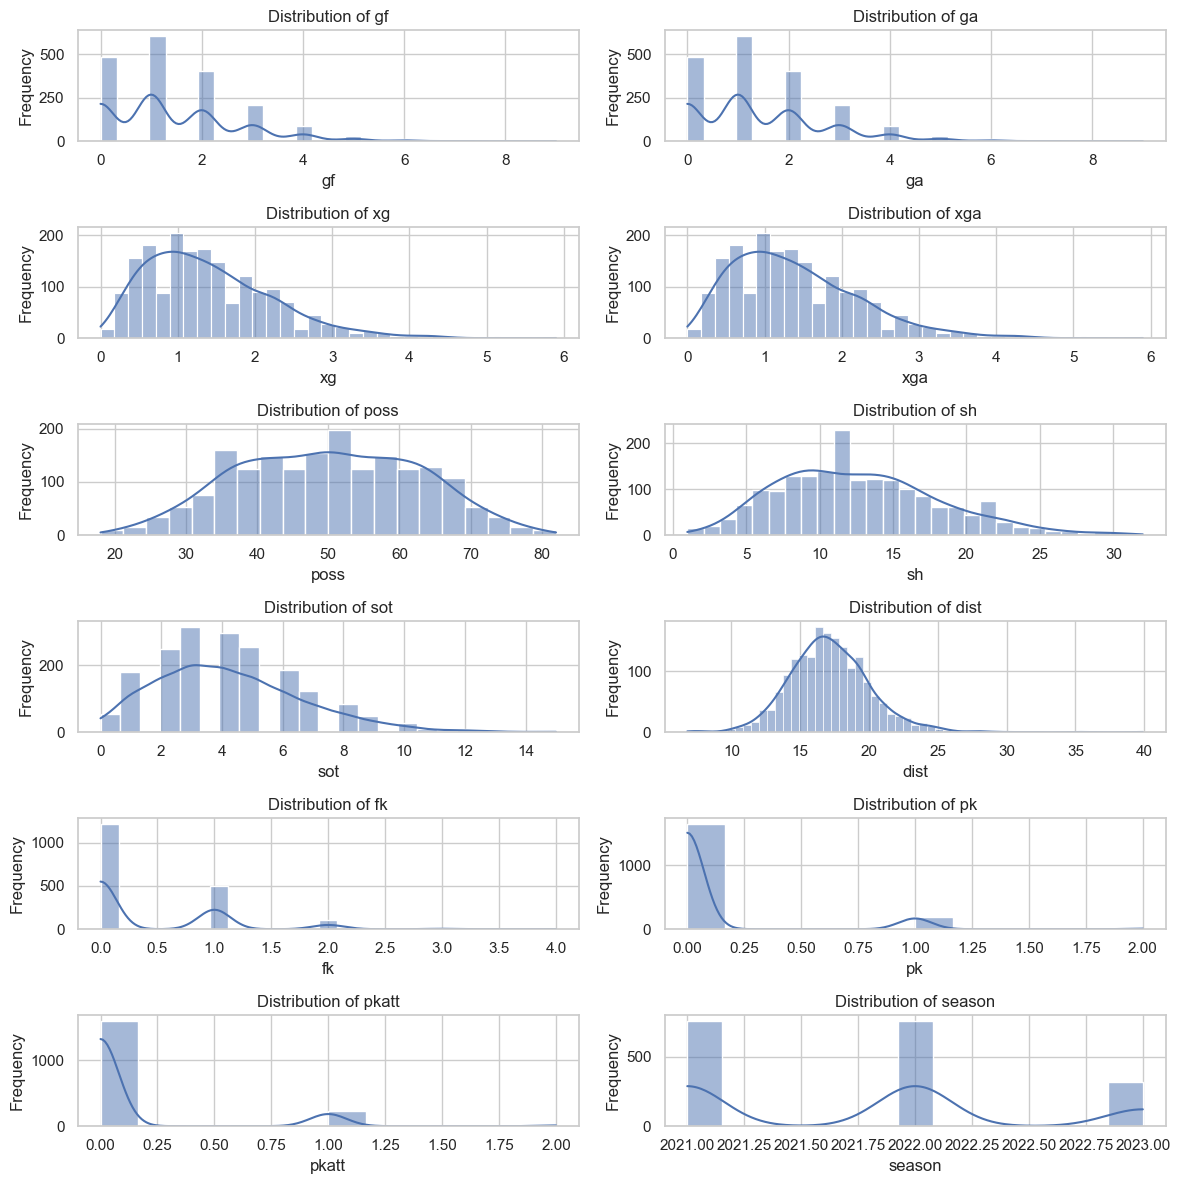

In [123]:
numerical_columns = matches.select_dtypes(include=[np.number])

fig, axes = plt.subplots(nrows=len(numerical_columns.columns)//2, ncols=2, figsize=(12, 2*len(numerical_columns.columns)//2))
axes = axes.flatten()

for i, column in enumerate(numerical_columns.columns):
    sns.histplot(matches[column], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

This code snippet analyzes and visualizes the results of matches between the teams 'Liverpool' and 'Arsenal' using a bar plot.The resulting bar plot visually represents the distribution of match results for games between Liverpool and Arsenal, providing insights into the performance of the two teams against each other. It is a concise and informative way to convey the outcomes of these specific matchups.

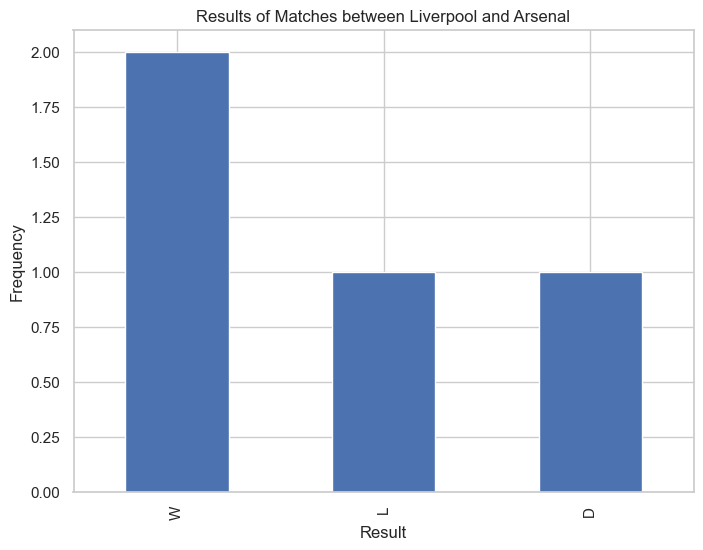

In [124]:
df = matches[['result','team','opponent']]
df_liverpool_vs_arsenal = df[(df['team'] == 'Liverpool') & (df['opponent'] == 'Arsenal')]
result_counts = df_liverpool_vs_arsenal['result'].value_counts()
result_counts.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.title('Results of Matches between Liverpool and Arsenal')
plt.show()

The resulting plot will likely show the distribution of different outcomes ('Win', 'Loss', 'Draw') for matches where the team is 'Liverpool'. Each bar in the plot represents the frequency or count of a specific result.

This type of visualization can provide insights into the distribution of match outcomes for a specific team, helping to understand their performance patterns over the available data. Adjusting the plot based on the specific requirements of the analysis can provide a clearer understanding of the distribution.

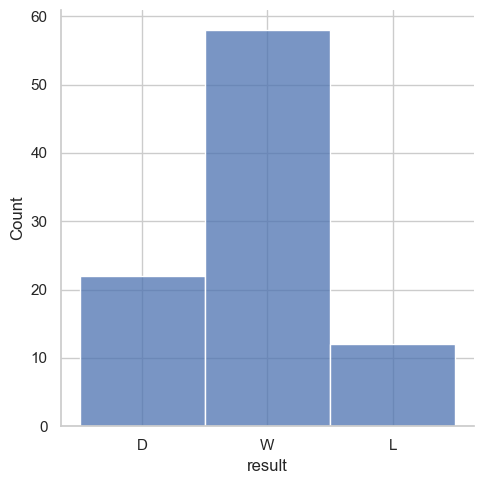

In [125]:
sns.displot(matches[(matches['team'] == 'Liverpool') & (matches['result'])], x='result')
plt.show()

#### Total Goals Scored and Conceded:
Calculate the total goals scored and conceded by each team in each season.

In [126]:
matches[['gf', 'ga', 'attendance']] = matches[['gf', 'ga', 'attendance']].apply(pd.to_numeric, errors='coerce')

total_goals = matches.groupby(['season', 'team'])[['gf', 'ga']].sum().reset_index()

# print(total_goals)


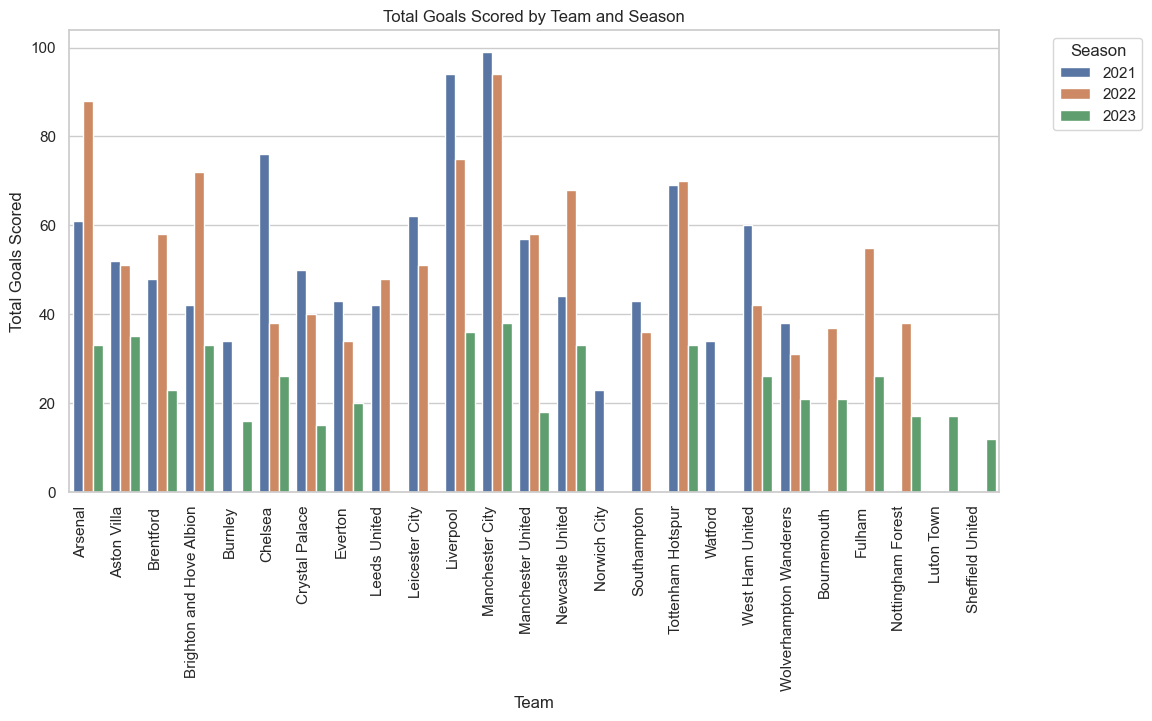

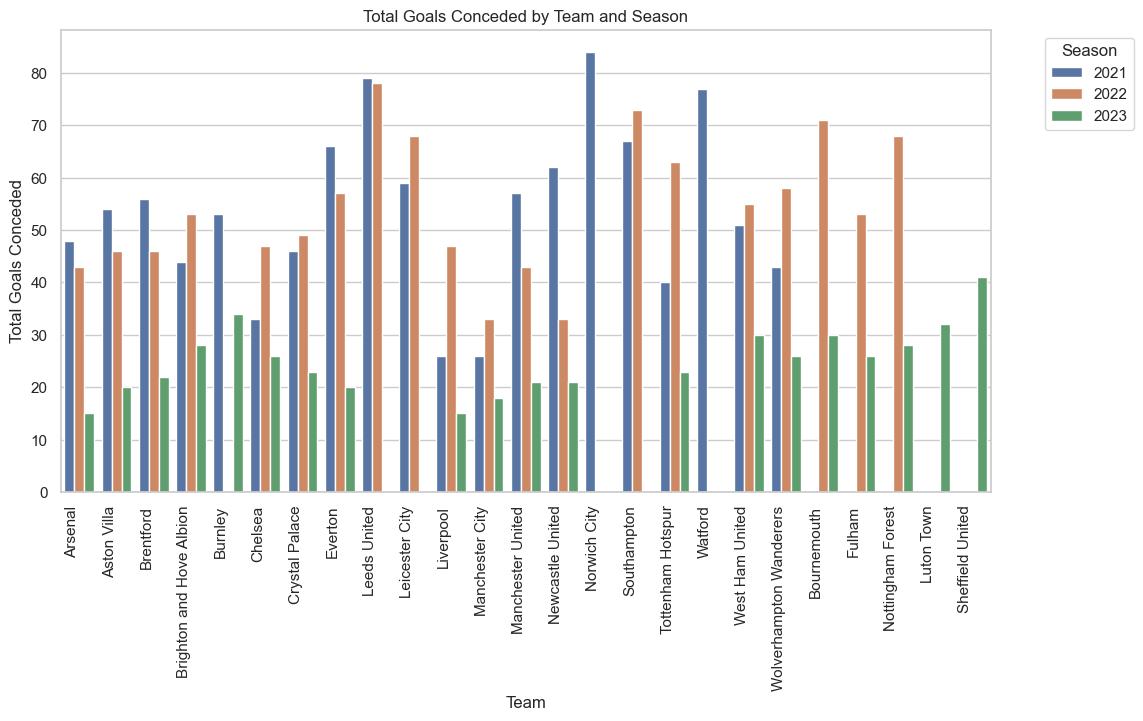

In [127]:
sns.set(style="whitegrid")

# goals scored
plt.figure(figsize=(12, 6))
sns.barplot(x='team', y='gf', hue='season', data=total_goals)
plt.title('Total Goals Scored by Team and Season')
plt.xlabel('Team')
plt.ylabel('Total Goals Scored')
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90, ha='right')
plt.show()

# goals conceded
plt.figure(figsize=(12, 6))
sns.barplot(x='team', y='ga', hue='season', data=total_goals)
plt.title('Total Goals Conceded by Team and Season')
plt.xlabel('Team')
plt.ylabel('Total Goals Conceded')
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90, ha='right')
plt.show()

#### Average Expected Goals (xG) and Expected Goals Against (xGA):
Analyze the average expected goals and expected goals against for each team in each season.

In [128]:
xg_summary = matches.groupby(['season', 'team']).agg({'xg': 'mean', 'xga': 'mean'})
# xg_summary

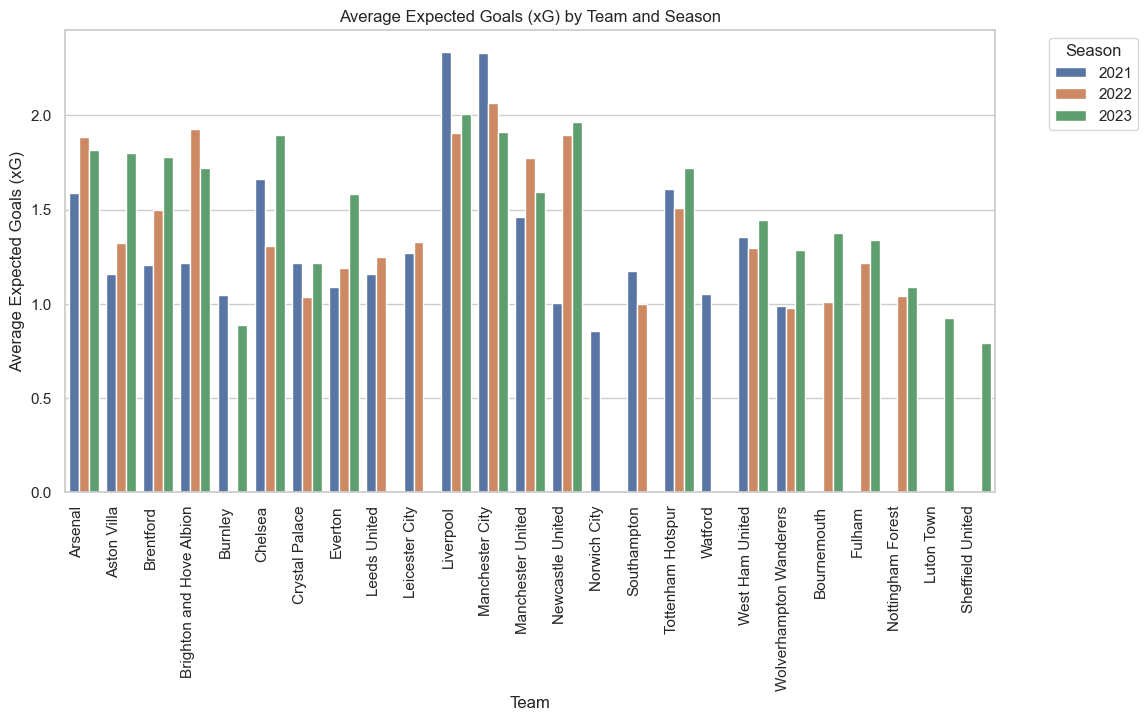

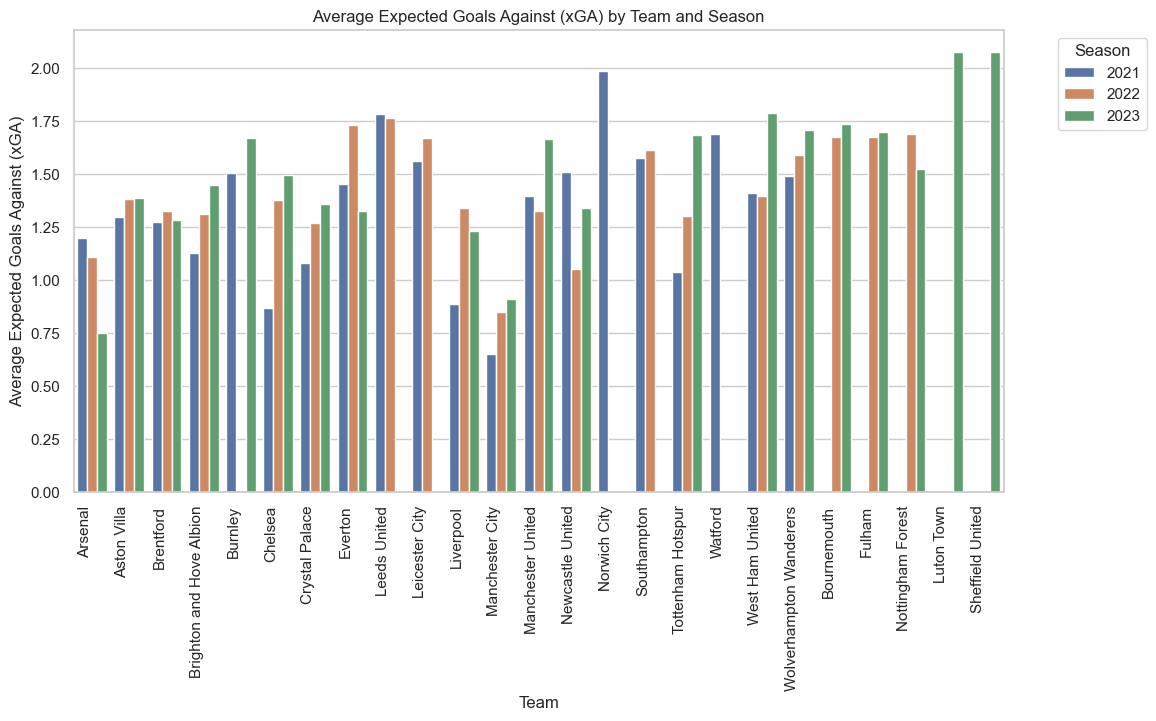

In [129]:
xg_summary_reset = xg_summary.reset_index()

# Expected goals 
plt.figure(figsize=(12, 6))
sns.barplot(x='team', y='xg', hue='season', data=xg_summary_reset)
plt.title('Average Expected Goals (xG) by Team and Season')
plt.xlabel('Team')
plt.ylabel('Average Expected Goals (xG)')
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90, ha='right')
plt.show()

# Expected goals against 
plt.figure(figsize=(12, 6))
sns.barplot(x='team', y='xga', hue='season', data=xg_summary_reset)
plt.title('Average Expected Goals Against (xGA) by Team and Season')
plt.xlabel('Team')
plt.ylabel('Average Expected Goals Against (xGA)')
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90, ha='right')
plt.show()

### Preparing the Model

#### Data Preprocessing

Convert categorical features into numerical for prediction

In [130]:
matches.dtypes

date           object
time           object
day            object
venue          object
result         object
gf            float64
ga            float64
opponent       object
xg            float64
xga           float64
poss          float64
attendance    float64
sh            float64
sot           float64
dist          float64
fk            float64
pk              int64
pkatt           int64
season          int64
team           object
dtype: object

In [131]:
matches['date'] = pd.to_datetime(matches['date'])

In [132]:
matches.dtypes

date          datetime64[ns]
time                  object
day                   object
venue                 object
result                object
gf                   float64
ga                   float64
opponent              object
xg                   float64
xga                  float64
poss                 float64
attendance           float64
sh                   float64
sot                  float64
dist                 float64
fk                   float64
pk                     int64
pkatt                  int64
season                 int64
team                  object
dtype: object

In [133]:
matches["venue code"] = matches["venue"].astype('category').cat.codes
matches["opponent code"] = matches["opponent"].astype('category').cat.codes
matches["result code"] = (matches["result"] == 'W').astype('int')
matches["goal_diff"] = matches['gf'] - matches['ga']
matches.head()

,date,time,day,venue,result,gf,ga,opponent,xg,xga,...,dist,fk,pk,pkatt,season,team,venue code,opponent code,result code,goal_diff
0,2023-08-13,16:30,Sun,Away,D,1.0,1.0,Chelsea,1.3,1.4,...,17.8,0.0,0,0,2023,Liverpool,0,6,0,0.0
1,2023-08-19,15:00,Sat,Home,W,3.0,1.0,Bournemouth,3.0,1.3,...,16.8,1.0,0,1,2023,Liverpool,1,2,1,2.0
2,2023-08-27,16:30,Sun,Away,W,2.0,1.0,Newcastle Utd,0.9,2.0,...,17.2,1.0,0,0,2023,Liverpool,0,16,1,1.0
3,2023-09-03,14:00,Sun,Home,W,3.0,0.0,Aston Villa,2.5,0.7,...,14.7,0.0,0,0,2023,Liverpool,1,1,1,3.0
4,2023-09-16,12:30,Sat,Away,W,3.0,1.0,Wolves,2.5,0.6,...,15.8,0.0,0,0,2023,Liverpool,0,24,1,2.0


In [134]:
matches['hour'] = matches['time'].str.split(':').str[0].astype('int')
matches.head()

,date,time,day,venue,result,gf,ga,opponent,xg,xga,...,fk,pk,pkatt,season,team,venue code,opponent code,result code,goal_diff,hour
0,2023-08-13,16:30,Sun,Away,D,1.0,1.0,Chelsea,1.3,1.4,...,0.0,0,0,2023,Liverpool,0,6,0,0.0,16
1,2023-08-19,15:00,Sat,Home,W,3.0,1.0,Bournemouth,3.0,1.3,...,1.0,0,1,2023,Liverpool,1,2,1,2.0,15
2,2023-08-27,16:30,Sun,Away,W,2.0,1.0,Newcastle Utd,0.9,2.0,...,1.0,0,0,2023,Liverpool,0,16,1,1.0,16
3,2023-09-03,14:00,Sun,Home,W,3.0,0.0,Aston Villa,2.5,0.7,...,0.0,0,0,2023,Liverpool,1,1,1,3.0,14
4,2023-09-16,12:30,Sat,Away,W,3.0,1.0,Wolves,2.5,0.6,...,0.0,0,0,2023,Liverpool,0,24,1,2.0,12


In [135]:
matches['day code'] = matches['date'].dt.dayofweek
matches.head()

,date,time,day,venue,result,gf,ga,opponent,xg,xga,...,pk,pkatt,season,team,venue code,opponent code,result code,goal_diff,hour,day code
0,2023-08-13,16:30,Sun,Away,D,1.0,1.0,Chelsea,1.3,1.4,...,0,0,2023,Liverpool,0,6,0,0.0,16,6
1,2023-08-19,15:00,Sat,Home,W,3.0,1.0,Bournemouth,3.0,1.3,...,0,1,2023,Liverpool,1,2,1,2.0,15,5
2,2023-08-27,16:30,Sun,Away,W,2.0,1.0,Newcastle Utd,0.9,2.0,...,0,0,2023,Liverpool,0,16,1,1.0,16,6
3,2023-09-03,14:00,Sun,Home,W,3.0,0.0,Aston Villa,2.5,0.7,...,0,0,2023,Liverpool,1,1,1,3.0,14,6
4,2023-09-16,12:30,Sat,Away,W,3.0,1.0,Wolves,2.5,0.6,...,0,0,2023,Liverpool,0,24,1,2.0,12,5


Plot a Heat map of the correlation matrix to determine the values that affects the result of the match

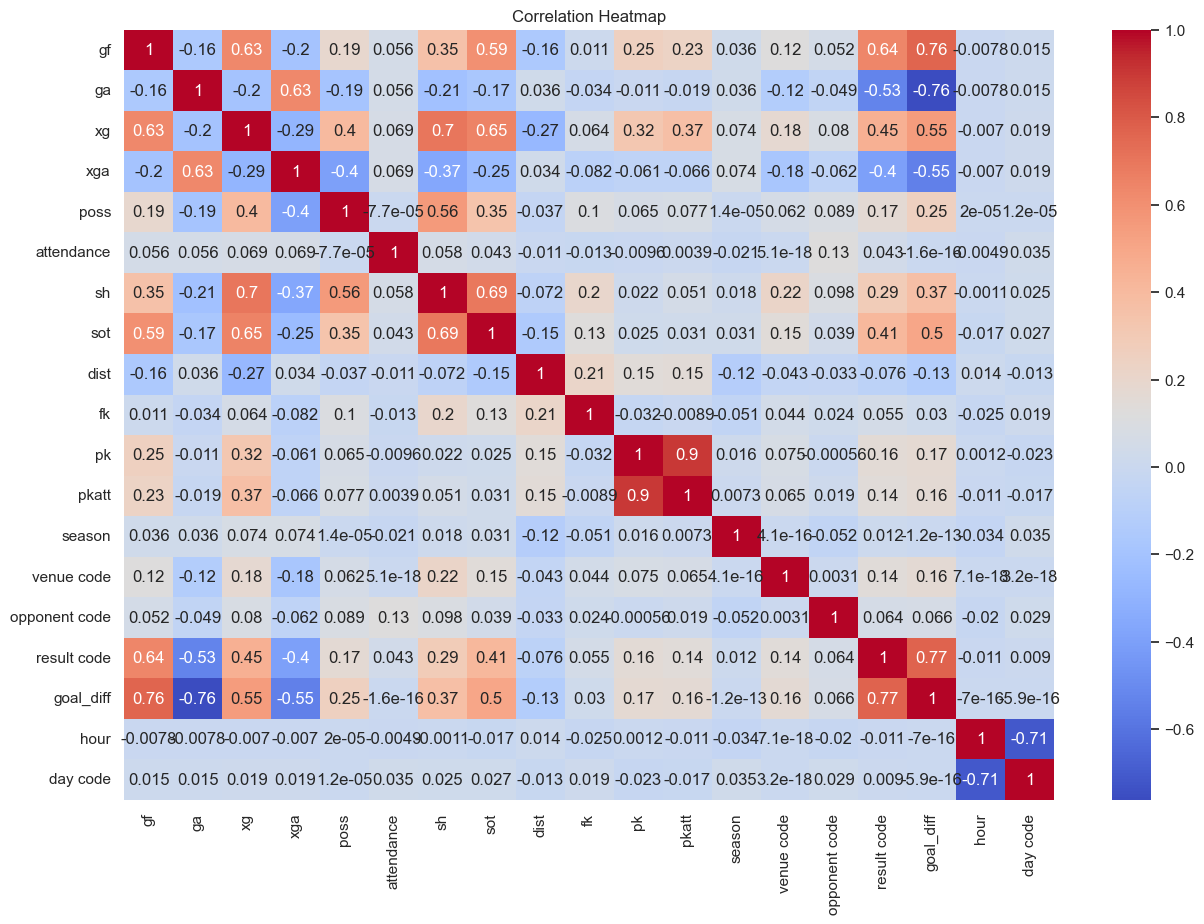

In [136]:
numerical_features = matches.select_dtypes(include=[np.number])

corrmatrix = numerical_features.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corrmatrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show();

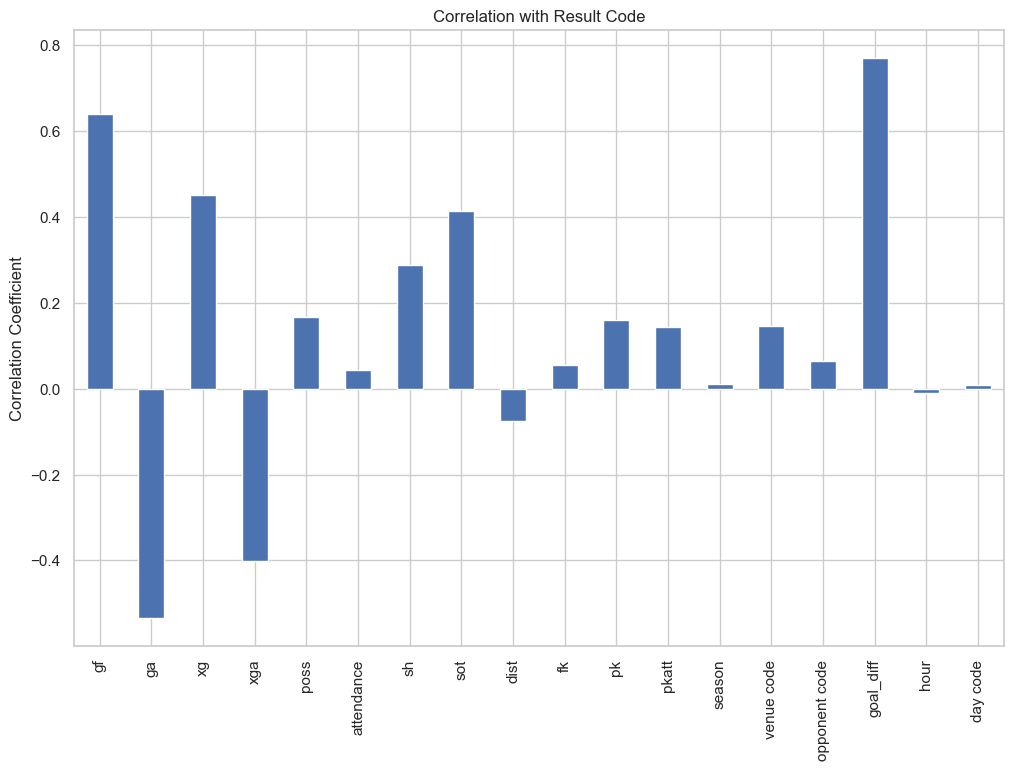

In [137]:
corrmatrix = corrmatrix['result code']

plt.figure(figsize=(12, 8))
corrmatrix.drop('result code').plot(kind='bar')
plt.title('Correlation with Result Code')
plt.ylabel('Correlation Coefficient')
plt.show()

#### Positive correlation with 'result code'
- **gf:** 0.639453  
  - Goals for (higher goals for, more likely to win)
- **goal_diff:** 0.770310  
  - Goal difference (higher goal difference, more likely to win)

#### Negative correlation with 'result code'
- **ga:** -0.533664  
  - Goals against (higher goals against, less likely to win)
- **xga:** -0.401597  
  - Expected goals against (higher expected goals against, less likely to win)
- **dist:** -0.076060  
  - Average shot distance (farther shots, less likely to win)

#### Moderate correlation with 'result code'
- **xg:** 0.449711  
  - Expected goals (higher expected goals, more likely to win)
- **sot:** 0.414310  
  - Shots on target (more shots on target, more likely to win)

#### Weak correlation with 'result code'
- **poss:** 0.167071  
  - Possession (weak positive correlation)
- **sh:** 0.287883  
  - Total shots (weak positive correlation)
- **fk:** 0.054682  
  - Free kicks (weak positive correlation)
- **pk:** 0.160191  
  - Penalties (weak positive correlation)
- **pkatt:** 0.142828  
  - Penalty attempts (weak positive correlation)
- **season:** 0.011858  
  - Season (weak positive correlation)
- **venue code:** 0.144986  
  - Venue code (weak positive correlation)
- **opponent code:** 0.063949  
  - Opponent code (weak positive correlation)

#### Very weak correlation with 'result code'
- **hour:** -0.010707  
  - Hour (very weak negative correlation)
- **day code:** 0.009008  
  - Day code (very weak positive correlation)


Define features based on the correlation matrix and target variable

In [138]:
features = matches[['gf', 'ga', 'xg', 'xga', 'sot', 'goal_diff']]
target = 'result code'

### Data Cleaning 

plot a series of boxplots to identify outliers

In [139]:
def plot_box_plots():
    l = ['gf', 'ga', 'xg', 'xga', 'sot', 'goal_diff']
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
    fig.suptitle('Box Plots for Selected Numerical Features')
    axes = axes.flatten()

    for i, feature in enumerate(l):
        sns.boxplot(x=matches[feature], ax=axes[i])

    plt.tight_layout()
    plt.show()


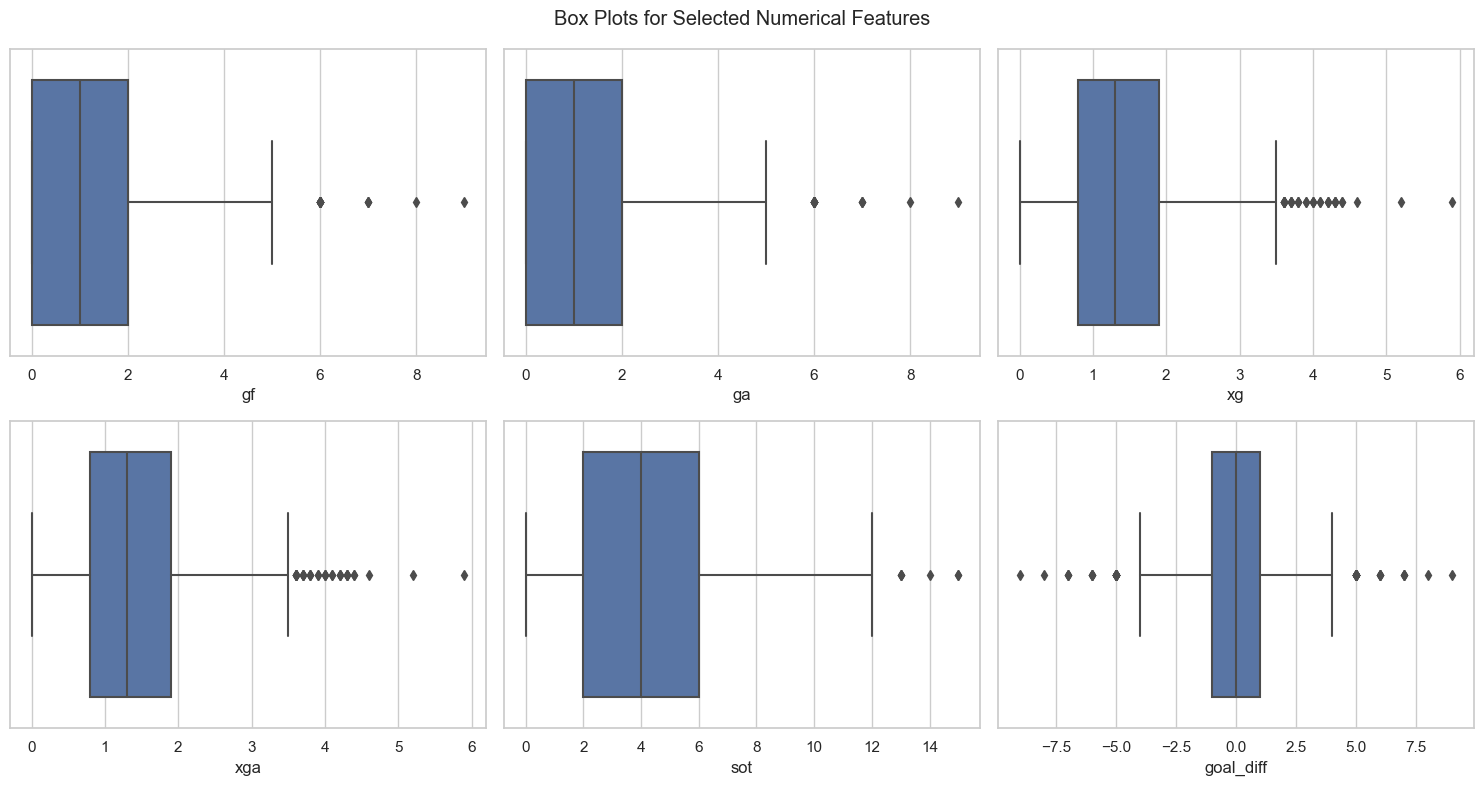

In [140]:
plot_box_plots()

In [141]:
features.describe()

,gf,ga,xg,xga,sot,goal_diff
count,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000
mean,1.442391,1.442391,1.402337,1.402337,4.204891,0.000000
std,1.310412,1.310412,0.826880,0.826880,2.446797,1.995645
min,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000
25%,0.000000,0.000000,0.800000,0.800000,2.000000,-1.000000
50%,1.000000,1.000000,1.300000,1.300000,4.000000,0.000000
75%,2.000000,2.000000,1.900000,1.900000,6.000000,1.000000
max,9.000000,9.000000,5.900000,5.900000,15.000000,9.000000


Handling outliers of the selected features

In [142]:
Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)
IQR = Q3 - Q1

def handle_outliers(column):
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    matches[column] = matches[column].clip(lower_bound, upper_bound)


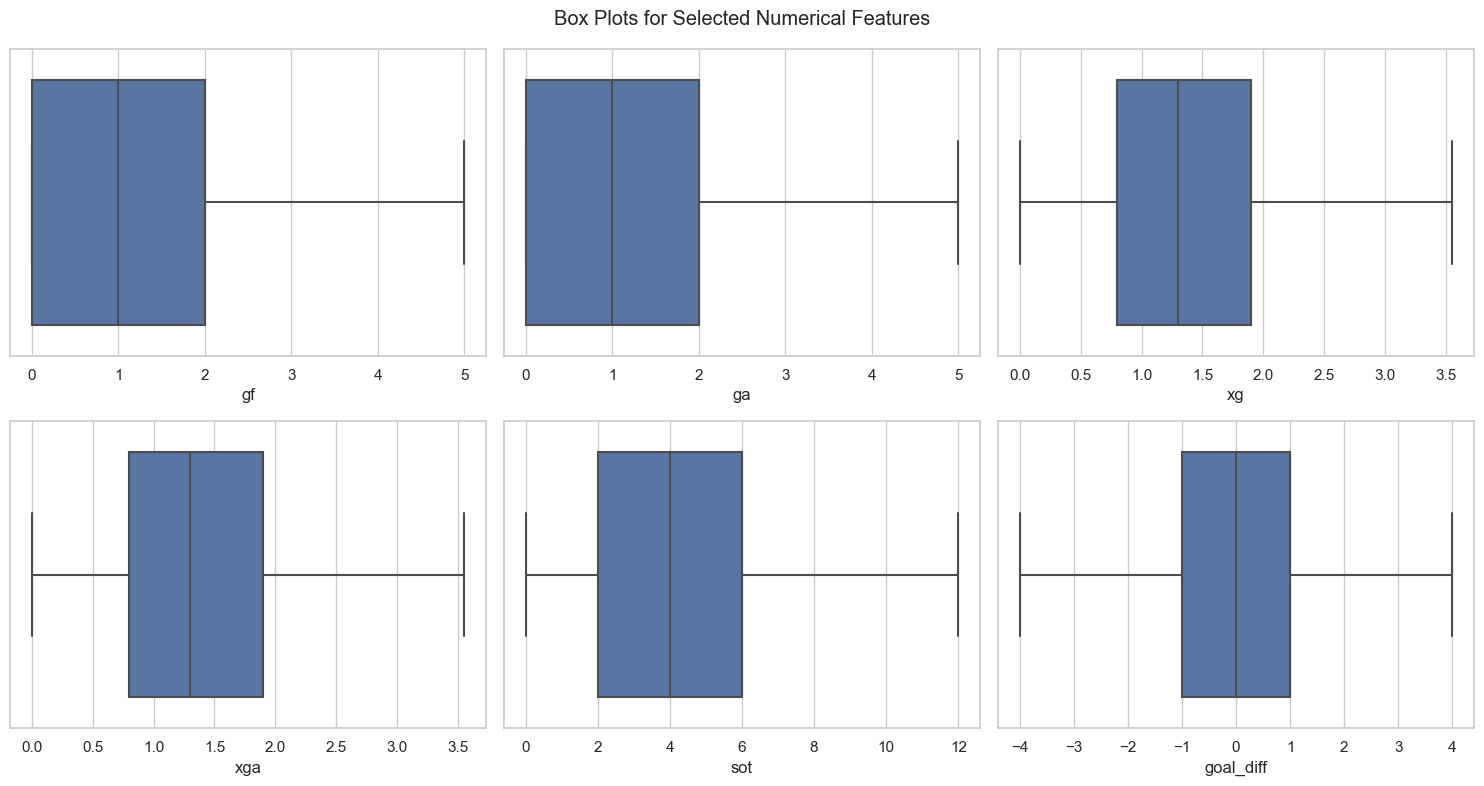

In [143]:
l = ['gf', 'ga', 'xg', 'xga', 'sot', 'goal_diff']
for feature in l:
    handle_outliers(feature)
    
plot_box_plots()


### Fitting the model

Split the data into training and testing

In [144]:
train = matches[matches['date'] < '2023-01-01']
test = matches[matches['date'] >= '2023-01-01']

In [145]:
X_train = train[list(features.columns)]
y_train = train[target]

X_test = test[list(features.columns)]
y_test = test[target]

Apply normal equation for fitting

In [146]:
def normal_equation(X_train, Y_train):
    XTX = np.dot(X_train.T, X_train)
    XTy = np.dot(X_train.T, Y_train)
    theta = np.dot(np.linalg.inv(XTX), XTy)
    return theta

In [147]:
theta = normal_equation(X_train, y_train)

In [148]:
predictions = np.dot(X_test, theta)

calculating metrics for regression

In [149]:
def calculate_metrics(y_true, y_pred):
    residuals = y_true - y_pred
    mse = np.mean(residuals**2)
    r2 = 1 - (np.sum(residuals**2) / np.sum((y_true - np.mean(y_true))**2))
    return mse, r2

In [150]:
MSE ,R2 = calculate_metrics(y_test, predictions)

print(f"MSE: {MSE}")
print(f"R2 score: {R2}")

MSE: 0.09740953419741906
R2 score: 0.5913994642526623


Adjusting the normal equation function adding the intercept term to improve the accuracy

In [151]:
def normal_equation(X_train, y_train):
    X_intercept = np.c_[np.ones(X_train.shape[0]), X_train]
    XTX = np.dot(X_intercept.T, X_intercept)
    XTy = np.dot(X_intercept.T, y_train)
    theta = np.dot(np.linalg.inv(XTX), XTy)
    return theta

In [152]:

X_test_intercept = np.c_[np.ones(X_test.shape[0]), X_test]

theta = normal_equation(X_train, y_train)
predictions = np.dot(X_test_intercept, theta)

MSE, R2 = calculate_metrics(y_test, predictions)

print(f"MSE: {MSE}")
print(f"R2 score: {R2}")

MSE: 0.08354998888084417
R2 score: 0.6495356383779776


### Showing results

In [153]:
result_df = pd.DataFrame(dict(actual=y_test, prediction=predictions))
result_df

,actual,prediction
0,0,0.365030
1,1,0.857193
2,1,0.598637
3,1,1.036909
4,1,0.855007
...,...,...
1075,0,0.001900
1076,0,0.327837
1077,0,-0.068191
1078,0,-0.000661


In [154]:
threshold = result_df['prediction'].sum()/len(result_df['prediction'])
result_df['predicted_binary'] = (result_df['prediction'] > threshold).astype(int)

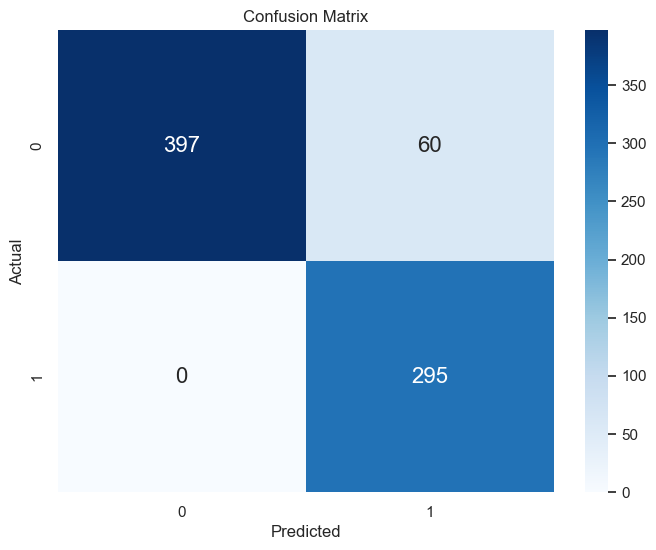

In [155]:
conf_matrix = confusion_matrix(result_df['actual'], result_df['predicted_binary'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Final Results:
- The model performed well in correctly identifying "wins" represented by `1` with `295` correct prediction.
- The model performed well in identifying correctly most of instances of "lose or draw" represented by `0` with `397` correct prediction.
- There were `60` false predictions, where the model incorrectly predicted a "win" when the actual outcome was "lose or draw." 
- There were no false predictions of predicting "lose or draw" when the actual outcome was a "win".